# Classification of Handwritten Digits

** Description about MNIST data **

MNIST data is a set of 70,000 small images of handwritten digits by students and employees. Each data point represents a set of labelled images represnting a digit. MNIST is the most studied dataset for a classification model.

** Getting the MNIST data set **

sklearn has modules to download wellknown datasets including MNIST data set

In [1]:
import seaborn as sns
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.datasets import mnist


Using TensorFlow backend.


In [2]:
(X_train, y_train),(X_test,y_test)= mnist.load_data()

Dataset from sklearn usually has dictionary datastructure where'DESCR' key has Description as a value, 'COL_NAMES' has column names as a value, 'data'has array of features and data points as values and 'target' has labels.

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
   
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

**Displaying a set of digits **

In [4]:
#for i in range(10):
 #   display(X_train[i],y_train[i])

** Convolutional Neural Network**

In [5]:
#Initialize Convolutional Neural Network
clf = Sequential()

In [6]:
#Convolution
from keras.layers import Conv2D
clf.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))

In [7]:
#Max Pooling
clf.add(MaxPooling2D(pool_size=(2,2)))

In [8]:
#Flattening
clf.add(Flatten())

In [9]:
#Adding An ANN
clf.add(Dense(units=128,activation='relu'))
clf.add(Dense(units=10,activation='softmax'))

In [10]:
clf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

** Normalize the input set to be between 0 to 1 **

In [11]:
X_train_norm = X_train/255
X_test_norm = X_test/255


**Use One hot encoding for the y to convert it to a binary matrix** 

In [12]:
from keras.utils import np_utils
y_train_norm = np_utils.to_categorical(y_train)
y_test_norm = np_utils.to_categorical(y_test)

In [13]:
X_train_norm = X_train_norm.reshape(X_train_norm.shape[0],28,28,1).astype('float32')
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0],28,28,1).astype('float32')
hist = clf.fit(X_train_norm,y_train_norm,validation_data=(X_test_norm, y_test_norm),
                                                           epochs=10,verbose=1,batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.2594 - acc: 0.9255 - val_loss: 0.0950 - val_acc: 0.9721
Epoch 2/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0841 - acc: 0.9755 - val_loss: 0.0591 - val_acc: 0.9817
Epoch 3/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0555 - acc: 0.9837 - val_loss: 0.0563 - val_acc: 0.9823
Epoch 4/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0422 - acc: 0.9873 - val_loss: 0.0457 - val_acc: 0.9841
Epoch 5/10
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0339 - acc: 0.9898 - val_loss: 0.0452 - val_acc: 0.9838
Epoch 6/10
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0278 - acc: 0.9915 - val_loss: 0.0385 - val_acc: 0.9853
Epoch 7/10
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0202 - acc: 0.9938 - val_loss: 0.0408 - val

In [14]:
score = clf.evaluate(X_test_norm,y_test_norm)

10000/10000 [==============================] - 12s 1ms/step


In [15]:
score
100-score[1]*100

1.3599999999999994

In [16]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

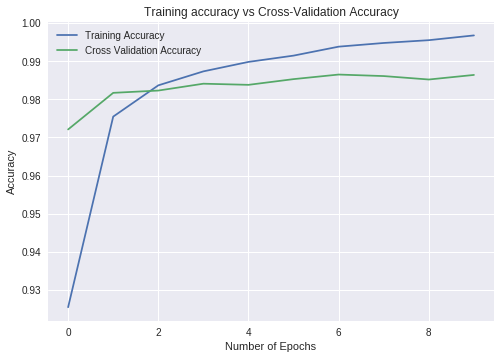

In [18]:
sns.set(style="darkgrid")
x_epoch = range(10)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

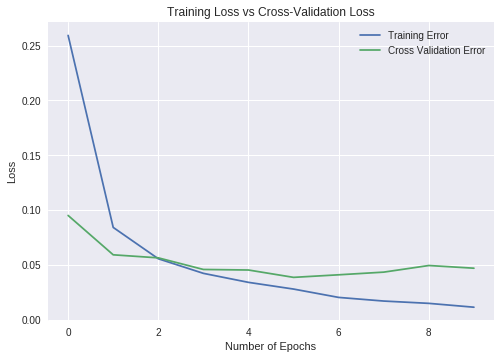

In [19]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])

#****************#

In [22]:
import numpy as np
y_test_pred = clf.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))


**Plot Confusion Matrix against Test data**

In [23]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 975,    0,    0,    0,    0,    2,    1,    1,    1,    0],
       [   0, 1132,    2,    0,    0,    0,    0,    0,    1,    0],
       [   2,    2, 1011,    2,    2,    0,    0,    7,    5,    1],
       [   0,    0,    0, 1001,    0,    5,    0,    1,    2,    1],
       [   0,    0,    0,    0,  977,    0,    0,    0,    0,    5],
       [   1,    0,    0,    6,    0,  882,    1,    0,    0,    2],
       [   8,    3,    0,    1,    4,   10,  930,    0,    2,    0],
       [   0,    2,    6,    1,    0,    0,    0, 1016,    1,    2],
       [   5,    0,    2,    3,    0,    3,    0,    4,  951,    6],
       [   1,    2,    0,    2,   10,    2,    0,    3,    0,  989]])

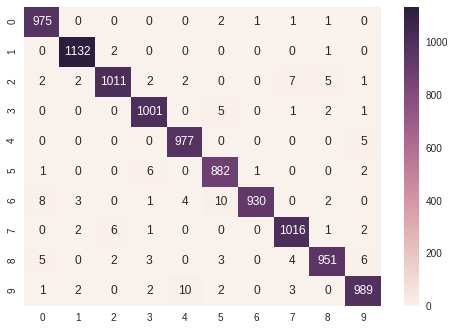

In [24]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [25]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

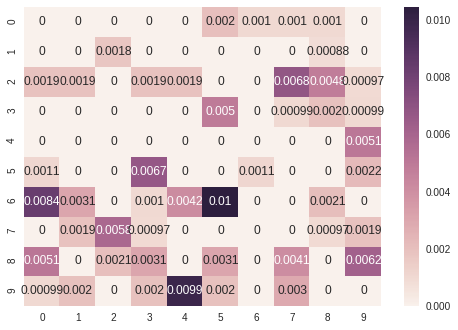

In [26]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.98640000000000005

**###########END###############**

**Initialize Neural Network**

In [28]:
#Initialize Convolutional Neural Network
clf = Sequential()

In [29]:
#first Convolution layer
from keras.layers import Conv2D
clf.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))

In [30]:
#Max Pooling
clf.add(MaxPooling2D(pool_size=(2,2)))
#second conv layer
clf.add(Conv2D(32,(3,3),activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))

In [31]:
#Flattening
clf.add(Flatten())

In [32]:
#Adding An ANN
clf.add(Dense(units=128,activation='relu'))
clf.add(Dense(units=10,activation='softmax'))

In [33]:
clf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
hist = clf.fit(X_train_norm,y_train_norm,validation_data=(X_test_norm, y_test_norm),epochs=10,verbose=1,batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 184s 3ms/step - loss: 0.2921 - acc: 0.9196 - val_loss: 0.0717 - val_acc: 0.9782
Epoch 2/10
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0716 - acc: 0.9778 - val_loss: 0.0543 - val_acc: 0.9810
Epoch 3/10
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0505 - acc: 0.9844 - val_loss: 0.0413 - val_acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0391 - acc: 0.9876 - val_loss: 0.0389 - val_acc: 0.9878
Epoch 5/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0313 - acc: 0.9901 - val_loss: 0.0424 - val_acc: 0.9860
Epoch 6/10
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0263 - acc: 0.9921 - val_loss: 0.0356 - val_acc: 0.9883
Epoch 7/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0220 - acc: 0.9933 - val_loss: 0.0327 - 

In [35]:
score = clf.evaluate(X_test_norm,y_test_norm)

10000/10000 [==============================] - 15s 1ms/step


In [36]:
score
100-score[1]*100

0.96999999999999886

In [37]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

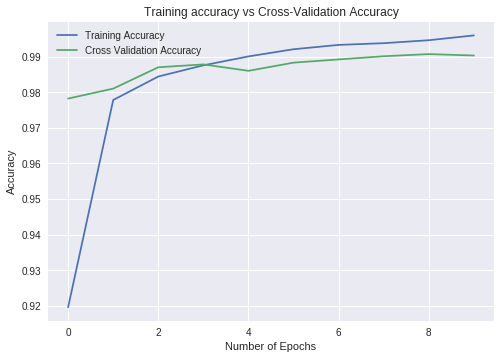

In [38]:
sns.set(style="darkgrid")
x_epoch = range(10)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

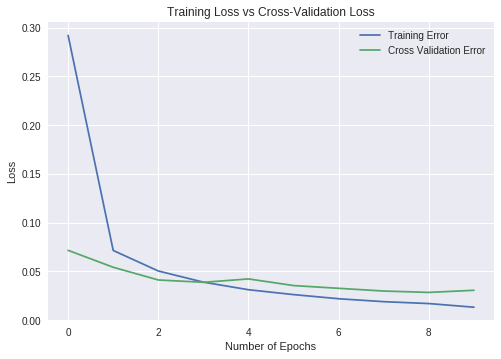

In [39]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])

In [40]:
test_loss, test_accuracy= clf.evaluate(X_test_norm,y_test_norm,batch_size=100)
test_loss

10000/10000 [==============================] - 11s 1ms/step


0.030707543354201335

In [41]:
test_accuracy

0.99030000507831573

In [42]:
y_test_pred = clf.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 8,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 4,
 4,
 2,


**Plot Confusion Matrix against Test data**

In [43]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 978,    0,    0,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1134,    0,    0,    0,    0,    1,    0,    0,    0],
       [   2,    0, 1017,    1,    2,    0,    0,    7,    3,    0],
       [   0,    1,    1, 1000,    0,    2,    0,    1,    5,    0],
       [   0,    0,    0,    0,  980,    0,    0,    0,    0,    2],
       [   2,    0,    0,    5,    0,  882,    1,    0,    2,    0],
       [   8,    3,    0,    0,    1,    1,  941,    0,    4,    0],
       [   0,    3,    3,    1,    0,    0,    0, 1017,    2,    2],
       [   3,    0,    0,    0,    0,    0,    0,    1,  968,    2],
       [   1,    2,    0,    1,   12,    4,    0,    1,    2,  986]])

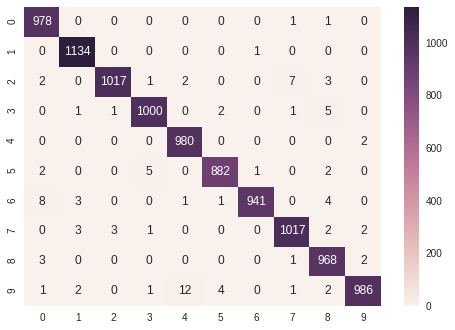

In [44]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [45]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

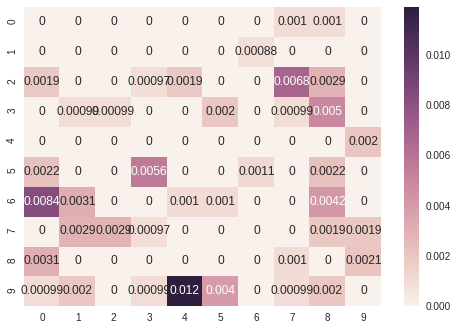

In [46]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.99029999999999996

**second end**

In [48]:
#Initialize Convolutional Neural Network
clf = Sequential()

In [49]:
#1st Convolution layer
from keras.layers import Conv2D
clf.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))

In [50]:
#Max Pooling
clf.add(MaxPooling2D(pool_size=(2,2)))
#second conv layer
clf.add(Conv2D(32,(3,3),activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))

In [51]:
#Flattening
clf.add(Flatten())

In [52]:
#Adding An ANN
clf.add(Dense(units=128,activation='relu'))
clf.add(Dense(units=10,activation='softmax'))

In [53]:
clf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
hist = clf.fit(X_train_norm,y_train_norm,validation_data=(X_test_norm, y_test_norm),epochs=15,verbose=1,batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 24465s 408ms/step - loss: 0.2874 - acc: 0.9200 - val_loss: 0.0793 - val_acc: 0.9755
Epoch 2/15
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0748 - acc: 0.9773 - val_loss: 0.0473 - val_acc: 0.9850
Epoch 3/15
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0528 - acc: 0.9838 - val_loss: 0.0438 - val_acc: 0.9857
Epoch 4/15
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0410 - acc: 0.9877 - val_loss: 0.0369 - val_acc: 0.9876
Epoch 5/15
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0334 - acc: 0.9900 - val_loss: 0.0343 - val_acc: 0.9888
Epoch 6/15
60000/60000 [==============================] - 252s 4ms/step - loss: 0.0274 - acc: 0.9913 - val_loss: 0.0371 - val_acc: 0.9872
Epoch 7/15
60000/60000 [==============================] - 222s 4ms/step - loss: 0.0244 - acc: 0.9923 - val_loss: 0.039

In [55]:
score = clf.evaluate(X_test_norm,y_test_norm)

10000/10000 [==============================] - 19s 2ms/step


In [56]:
score
100-score[1]*100

0.89000000000000057

In [57]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

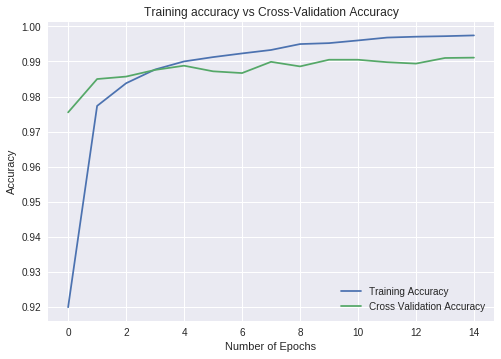

In [59]:
sns.set(style="darkgrid")
x_epoch = range(15)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

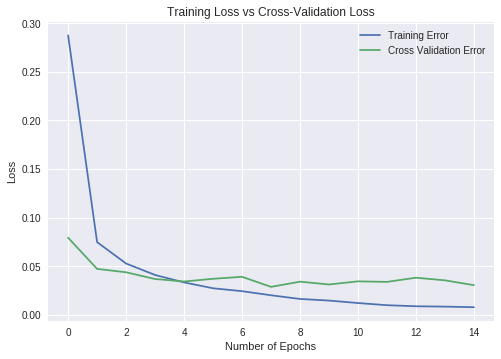

In [63]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])

In [64]:
test_loss, test_accuracy= clf.evaluate(X_test_norm,y_test_norm,batch_size=100)
test_loss

10000/10000 [==============================] - 13s 1ms/step


0.030542506212764522

In [65]:
test_accuracy

0.99110000550746913

In [66]:
y_test_pred = clf.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 8,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 5,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 4,
 4,
 2,


**Plot Confusion Matrix against Test data**

In [67]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 975,    0,    0,    0,    0,    0,    1,    2,    2,    0],
       [   0, 1132,    1,    1,    0,    0,    1,    0,    0,    0],
       [   1,    0, 1015,    3,    1,    0,    1,    8,    3,    0],
       [   0,    0,    0, 1002,    0,    3,    0,    1,    4,    0],
       [   0,    0,    0,    0,  980,    0,    1,    0,    0,    1],
       [   1,    0,    0,    8,    0,  880,    2,    0,    1,    0],
       [   2,    2,    0,    0,    1,    2,  949,    0,    2,    0],
       [   0,    1,    2,    1,    0,    0,    0, 1022,    1,    1],
       [   2,    0,    2,    1,    0,    1,    0,    0,  966,    2],
       [   0,    1,    0,    3,    6,    5,    0,    2,    2,  990]])

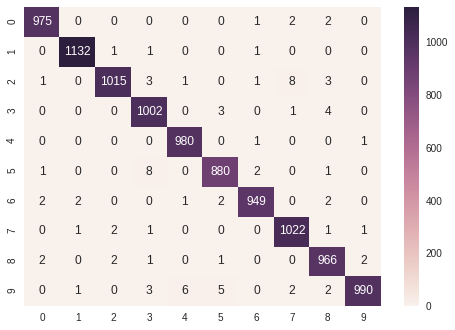

In [68]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [69]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

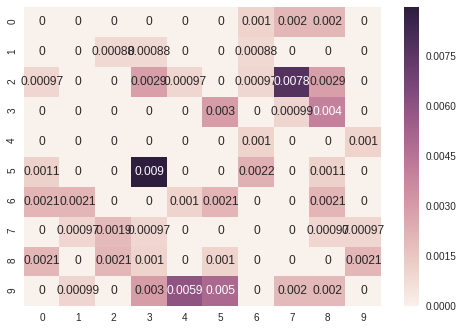

In [70]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.99109999999999998

**Third end**